In [4]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, avg, min, max, when

spark = SparkSession.builder.appName("HealthcareAnalysis").getOrCreate()

# Load dataset
df = spark.read.csv("heart.csv", header=True, inferSchema=True)

# 1. Total patients
print("Total Patients:", df.count())

# 2. Average age
df.select(avg("age")).show()

# 3. Gender count
df.groupBy("sex").count().show()  # 0=female, 1=male

# 4. Heart disease count
df.groupBy("target").count().show()  # 1=disease, 0=no disease

# 5. Max and min cholesterol
df.select(max("chol").alias("MaxCholesterol"), min("chol").alias("MinCholesterol")).show()

# 6. Patients grouped by age range
age_grouped = df.withColumn("AgeRange", 
    when((col("age") >= 20) & (col("age") <= 30), "20-30")
    .when((col("age") >= 31) & (col("age") <= 40), "31-40")
    .when((col("age") >= 41) & (col("age") <= 50), "41-50")
    .when((col("age") >= 51) & (col("age") <= 60), "51-60")
    .otherwise("60+")
)
age_grouped.groupBy("AgeRange").count().show()

# 7. Save high-risk patients
pdf = high_risk.toPandas()
pdf.to_csv("HighRiskPatients.csv", index=False)


Total Patients: 1025
+-----------------+
|         avg(age)|
+-----------------+
|54.43414634146342|
+-----------------+

+---+-----+
|sex|count|
+---+-----+
|  1|  713|
|  0|  312|
+---+-----+

+------+-----+
|target|count|
+------+-----+
|     1|  526|
|     0|  499|
+------+-----+

+--------------+--------------+
|MaxCholesterol|MinCholesterol|
+--------------+--------------+
|           564|           126|
+--------------+--------------+

+--------+-----+
|AgeRange|count|
+--------+-----+
|   20-30|    4|
|     60+|  272|
|   41-50|  247|
|   31-40|   64|
|   51-60|  438|
+--------+-----+



In [6]:
!pip install matplotlib seaborn


     ---------------------------------------- 8.1/8.1 MB 3.8 MB/s eta 0:00:00
     -------------------------------------- 294.9/294.9 kB 3.0 MB/s eta 0:00:00
     ---------------------------------------- 2.3/2.3 MB 3.2 MB/s eta 0:00:00
     ---------------------------------------- 73.7/73.7 kB 1.4 MB/s eta 0:00:00
     ---------------------------------------- 113.9/113.9 kB ? eta 0:00:00
     -------------------------------------- 221.2/221.2 kB 6.8 MB/s eta 0:00:00



[notice] A new release of pip available: 22.2.2 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


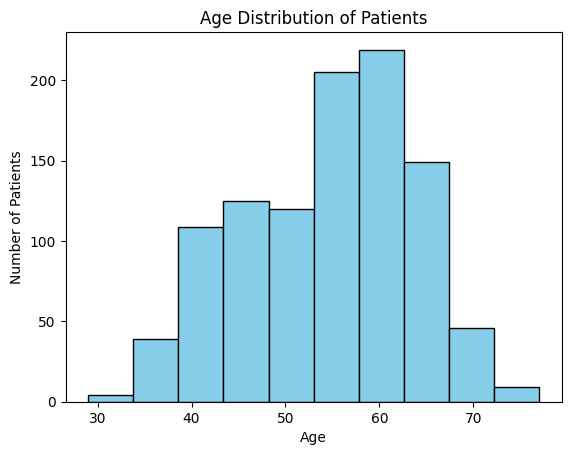

In [7]:
import matplotlib.pyplot as plt

# Convert to pandas
pdf = df.select("age").toPandas()

plt.hist(pdf["age"], bins=10, color="skyblue", edgecolor="black")
plt.title("Age Distribution of Patients")
plt.xlabel("Age")
plt.ylabel("Number of Patients")
plt.show()


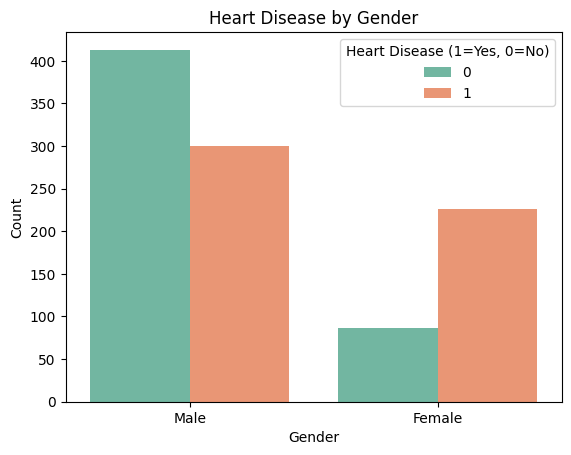

In [8]:
pdf = df.select("sex", "target").toPandas()

gender_map = {0: "Female", 1: "Male"}
pdf["sex"] = pdf["sex"].map(gender_map)

import seaborn as sns
sns.countplot(data=pdf, x="sex", hue="target", palette="Set2")
plt.title("Heart Disease by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.legend(title="Heart Disease (1=Yes, 0=No)")
plt.show()


C:\Users\khans\AppData\Local\Temp\ipykernel_11776\2907617481.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=pdf, x="target", y="chol", palette="Set3")


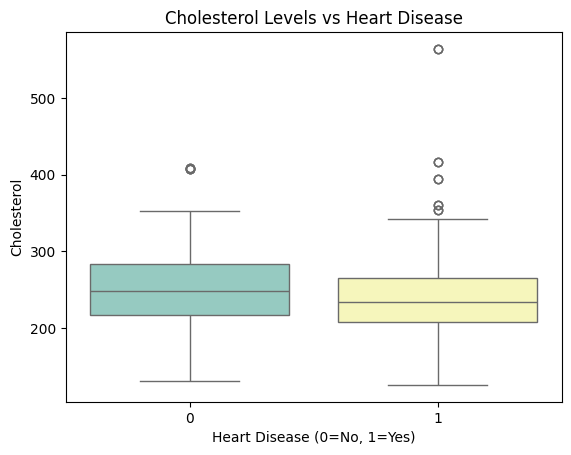

In [9]:
pdf = df.select("chol", "target").toPandas()

sns.boxplot(data=pdf, x="target", y="chol", palette="Set3")
plt.title("Cholesterol Levels vs Heart Disease")
plt.xlabel("Heart Disease (0=No, 1=Yes)")
plt.ylabel("Cholesterol")
plt.show()


C:\Users\khans\AppData\Local\Temp\ipykernel_11776\4116304203.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=pdf, x="AgeGroup", y="thalach", estimator=np.mean, palette="coolwarm")


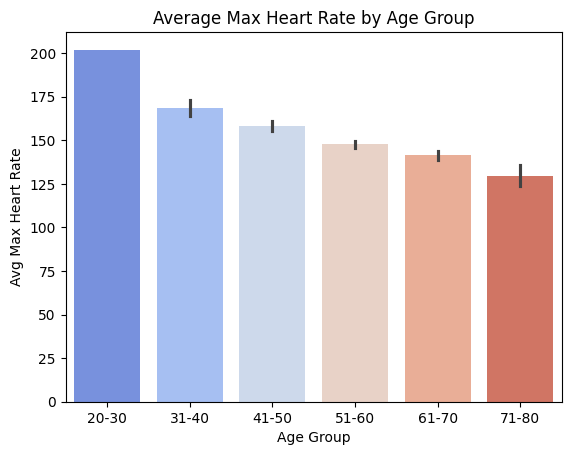

In [13]:
pdf = df.select("age", "thalach").toPandas()

# Create age groups
bins = [20, 30, 40, 50, 60, 70, 80]
labels = ["20-30", "31-40", "41-50", "51-60", "61-70", "71-80"]
pdf["AgeGroup"] = pd.cut(pdf["age"], bins=bins, labels=labels, right=False)

sns.barplot(data=pdf, x="AgeGroup", y="thalach", estimator=np.mean, palette="coolwarm")
plt.title("Average Max Heart Rate by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Avg Max Heart Rate")
plt.show()


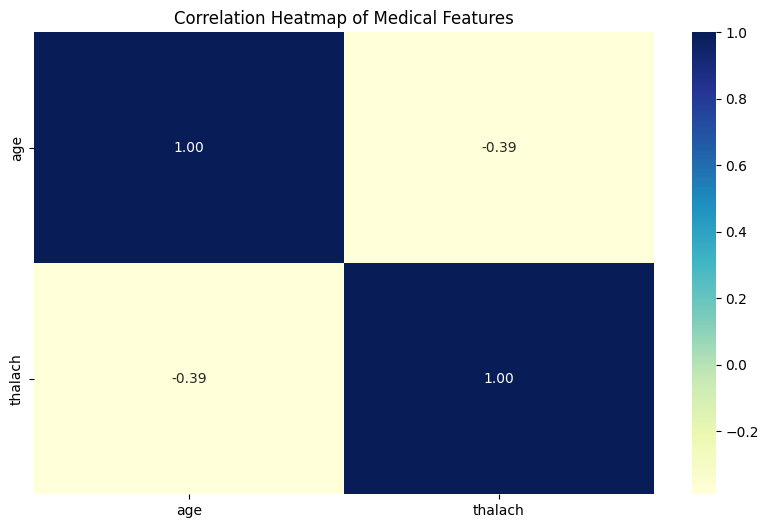

In [11]:
corr = pdf.corr(numeric_only=True)

plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Correlation Heatmap of Medical Features")
plt.show()
